# Validation


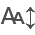

In [1]:
from policyengine_uk_data import EnhancedFRS_2022_23, FRS_2022_23, SPI_2020_21
from policyengine_uk_data.utils.loss import get_loss_results
import pandas as pd
from itables import init_notebook_mode
from utils import show
import itables.options as opt
opt.maxBytes = "1MB"

init_notebook_mode(all_interactive=True)

def get_validation():
    df = pd.DataFrame()
    for dataset in [FRS_2022_23, EnhancedFRS_2022_23]:
        for year in range(2022, 2029):
            loss_results = get_loss_results(dataset, year)
            loss_results["time_period"] = year
            loss_results["dataset"] = dataset.label
            df = pd.concat([df, loss_results])
    df = df.reset_index(drop=True)
    return df

df = get_validation()
truth_df = df[df.dataset == df.dataset.unique()[0]].reset_index()
truth_df["estimate"] = truth_df["target"]
truth_df["error"] = truth_df["estimate"] - truth_df["target"]
truth_df["abs_error"] = truth_df["error"].abs()
truth_df["rel_error"] = truth_df["error"] / truth_df["target"]
truth_df["abs_rel_error"] = truth_df["rel_error"].abs()
truth_df["dataset"] = "Official"
df = pd.concat([df, truth_df]).reset_index(drop=True)

Calibration check: the table below shows how both the original and enhanced FRS datasets compare to over 2,000 official statistics (which the EFRS was explicitly calibrated to hit) from the OBR, DWP and HMRC.

Since the EFRS is calibrated to these statistics, high performance is expected and achieved.

## Full results

In [2]:
df.drop(columns=["index"])

name      estimate  \
0                              obr/attendance_allowance  3.620932e+09   
1                                  obr/carers_allowance  2.809091e+09   
2                                               obr/dla  3.889957e+09   
3                                               obr/esa  7.209292e+09   
4                                       obr/esa_contrib  1.777680e+09   
...                                                 ...           ...   
7009  hmrc/property_income_count_income_band_13_12_5...  2.284622e+06   
7010  hmrc/savings_interest_income_income_band_13_12...  4.017425e+09   
7011  hmrc/savings_interest_income_count_income_band...  1.132112e+07   
7012  hmrc/dividend_income_income_band_13_12_570.0_t...  1.141459e+11   
7013  hmrc/dividend_income_count_income_band_13_12_5...  3.855299e+06   

            target         error     abs_error  rel_error  abs_rel_error  \
0     5.700000e+09 -2.079068e+09  2.079068e+09  -0.364749       0.364749   
1     3.300000e+09 -4.909088e+08  4.909088e+08  -0.148760       0.148760   
2     6.000000e+09 -2.110043e+09  2.110043e+09  -0.351674       0.351674   
3     1.210000e+10 -4.890708e+09  4.890708e+09  -0.404191       0.404191   
4     4.500000e+09 -2.722320e+09  2.722320e+09  -0.604960       0.604960   
...            ...           ...           ...        ...            ...   
7009  2.284622e+06  0.000000e+00  0.000000e+00   0.000000       0.000000   
7010  4.017425e+09  0.000000e+00  0.000000e+00   0.000000       0.000000   
7011  1.132112e+07  0.000000e+00  0.000000e+00   0.000000       0.000000   
7012  1.141459e+11  0.000000e+00  0.000000e+00   0.000000       0.000000   
7013  3.855299e+06  0.000000e+00  0.000000e+00   0.000000       0.000000   

      time_period        dataset  
0            2022  FRS (2022-23)  
1            2022  FRS (2022-23)  
2            2022  FRS (2022-23)  
3            2022  FRS (2022-23)  
4            2022  FRS (2022-23)  
...           ...            ...  
7009         2028       Official  
7010         2028       Official  
7011         2028       Official  
7012         2028       Official  
7013         2028       Official  

[7014 rows x 9 columns]

## Comparisons

In [3]:
merged = pd.merge(
    df[df.dataset == "FRS (2022-23)"],
    df[df.dataset == "Enhanced FRS (2022-23)"],
    on=["time_period", "name"],
    suffixes=("_frs", "_efrs"),
)
merged["rel_error_change_under_efrs"] = merged["abs_rel_error_efrs"] - merged["abs_rel_error_frs"]
# Sort columns
merged = merged[
    [
        "name",
        "time_period",
        "target_frs",
        "estimate_frs",
        "estimate_efrs",
        "error_frs",
        "error_efrs",
        "abs_error_frs",
        "abs_error_efrs",
        "rel_error_frs",
        "rel_error_efrs",
        "abs_rel_error_frs",
        "abs_rel_error_efrs",
        "rel_error_change_under_efrs",
    ]
]
merged

name  time_period  \
0                              obr/attendance_allowance         2022   
1                                  obr/carers_allowance         2022   
2                                               obr/dla         2022   
3                                               obr/esa         2022   
4                                       obr/esa_contrib         2022   
...                                                 ...          ...   
2333  hmrc/property_income_count_income_band_13_12_5...         2028   
2334  hmrc/savings_interest_income_income_band_13_12...         2028   
2335  hmrc/savings_interest_income_count_income_band...         2028   
2336  hmrc/dividend_income_income_band_13_12_570.0_t...         2028   
2337  hmrc/dividend_income_count_income_band_13_12_5...         2028   

        target_frs  estimate_frs  estimate_efrs     error_frs    error_efrs  \
0     5.700000e+09  3.620932e+09   5.695060e+09 -2.079068e+09 -4.939709e+06   
1     3.300000e+09  2.809091e+09   3.863295e+09 -4.909088e+08  5.632946e+08   
2     6.000000e+09  3.889957e+09   5.983472e+09 -2.110043e+09 -1.652775e+07   
3     1.210000e+10  7.209292e+09   1.222011e+10 -4.890708e+09  1.201081e+08   
4     4.500000e+09  1.777680e+09   4.342632e+09 -2.722320e+09 -1.573679e+08   
...            ...           ...            ...           ...           ...   
2333  2.284622e+06  1.786734e+06   2.287644e+06 -4.978880e+05  3.022076e+03   
2334  4.017425e+09  6.713753e+09   3.925402e+09  2.696327e+09 -9.202306e+07   
2335  1.132112e+07  1.618619e+07   1.126841e+07  4.865073e+06 -5.270184e+04   
2336  1.141459e+11  1.085598e+10   1.146372e+11 -1.032899e+11  4.912688e+08   
2337  3.855299e+06  2.787673e+06   3.853818e+06 -1.067626e+06 -1.481255e+03   

      abs_error_frs  abs_error_efrs  rel_error_frs  rel_error_efrs  \
0      2.079068e+09    4.939709e+06      -0.364749       -0.000867   
1      4.909088e+08    5.632946e+08      -0.148760        0.170695   
2      2.110043e+09    1.652775e+07      -0.351674       -0.002755   
3      4.890708e+09    1.201081e+08      -0.404191        0.009926   
4      2.722320e+09    1.573679e+08      -0.604960       -0.034971   
...             ...             ...            ...             ...   
2333   4.978880e+05    3.022076e+03      -0.217930        0.001323   
2334   2.696327e+09    9.202306e+07       0.671158       -0.022906   
2335   4.865073e+06    5.270184e+04       0.429734       -0.004655   
2336   1.032899e+11    4.912688e+08      -0.904894        0.004304   
2337   1.067626e+06    1.481255e+03      -0.276924       -0.000384   

      abs_rel_error_frs  abs_rel_error_efrs  rel_error_change_under_efrs  
0              0.364749            0.000867                    -0.363882  
1              0.148760            0.170695                     0.021935  
2              0.351674            0.002755                    -0.348919  
3              0.404191            0.009926                    -0.394264  
4              0.604960            0.034971                    -0.569989  
...                 ...                 ...                          ...  
2333           0.217930            0.001323                    -0.216607  
2334           0.671158            0.022906                    -0.648252  
2335           0.429734            0.004655                    -0.425079  
2336           0.904894            0.004304                    -0.900590  
2337           0.276924            0.000384                    -0.276540  

[2338 rows x 14 columns]